## 인구 데이터 관찰

### 데이터 준비

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 인구 데이터 불러오기
df_pop = pd.read_csv('../data/1-1.화성시_거주인구.csv')
df_pop.head()

,gid,year,m_20g_pop,w_20g_pop,m_30g_pop,w_30g_pop,m_40g_pop,w_40g_pop,m_50g_pop,w_50g_pop,m_60g_pop,w_60g_pop,m_70g_pop,w_70g_pop,m_80g_pop,w_80g_pop,m_90g_pop,w_90g_pop,m_100g_pop,w_100g_pop
0,다사385011,2023,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN
1,다사312110,2023,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,다사473033,2023,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,다사602117,2023,10.0,7.0,15.0,6.0,6.0,9.0,6.0,7.0,0.0,9.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN
4,다사476205,2023,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 인구 데이터 EDA

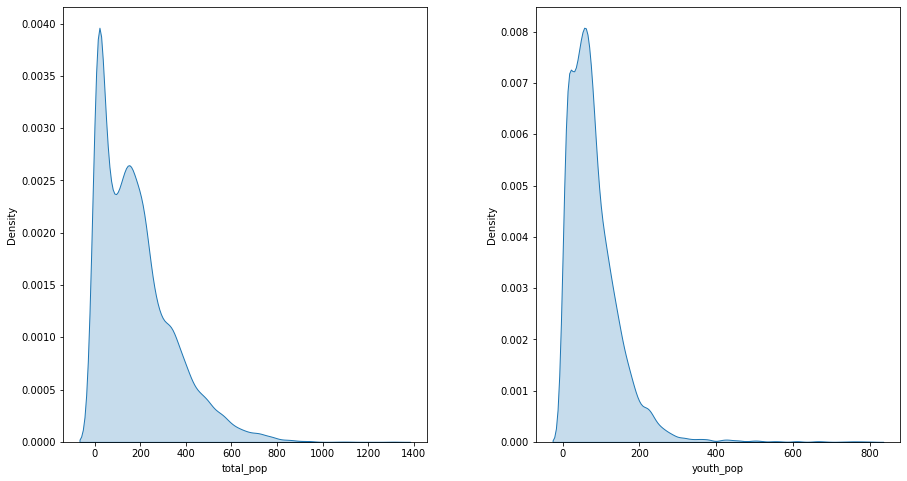

In [3]:
# 격자와 인구 정보 결합
df_merged_pop = gdf.merge(df_pop, on="gid")

# 총 인구 컬럼 생성
df_merged_pop['total_pop'] = df_merged_pop.iloc[:,4:].sum(axis=1)

# 청년 인구 컬럼 생성
df_merged_pop['youth_pop'] = df_merged_pop.iloc[:,4:8].sum(axis=1) 
df_merged_pop

# 총 인구가 0이 아닌 격자에 한해 KDE 관찰
df_merged_pop_over = df_merged_pop[df_merged_pop['total_pop']>0]
df_merged_pop_over_y = df_merged_pop[df_merged_pop['youth_pop']>0]

# 인구 분포 KDEPlot
f, axs = plt.subplots(1, 2, figsize=(15,8))
sns.kdeplot(x='total_pop', data=df_merged_pop_over, fill=True, ax = axs[0])
sns.kdeplot(x='youth_pop', data=df_merged_pop_over_y, fill=True, ax = axs[1])
plt.subplots_adjust(wspace=0.3)

In [4]:
# 연도별로 데이터 구분 
df_merged_pop_2023 = df_merged_pop[df_merged_pop['year'] == 2023].reset_index(drop=True)
df_merged_pop_2022 = df_merged_pop[df_merged_pop['year'] == 2022].reset_index(drop=True)
df_merged_pop_2021 = df_merged_pop[df_merged_pop['year'] == 2021].reset_index(drop=True)
df_merged_pop_2020 = df_merged_pop[df_merged_pop['year'] == 2020].reset_index(drop=True)

df_merged_pop_2020.rename(columns={'youth_pop' : 'youth_pop_20', 
                                   'total_pop' : 'total_pop_20'}, inplace=True)

df_merged_pop_20_23 = df_merged_pop_2023.merge(df_merged_pop_2020[['gid', 'youth_pop_20', 'total_pop_20']], on='gid')
df_merged_pop_20_23                                                                  

# 20년 대비 인구 차이 
df_merged_pop_2023['23_20_total_gap'] = df_merged_pop_20_23['total_pop'] - df_merged_pop_20_23['total_pop_20']
df_merged_pop_2023['23_20_youth_gap'] = df_merged_pop_20_23['youth_pop'] - df_merged_pop_20_23['youth_pop_20']
df_merged_pop_2023

,gid,lon,lat,year,m_20g_pop,w_20g_pop,m_30g_pop,w_30g_pop,m_40g_pop,w_40g_pop,...,m_80g_pop,w_80g_pop,m_90g_pop,w_90g_pop,m_100g_pop,w_100g_pop,total_pop,youth_pop,23_20_total_gap,23_20_youth_gap
0,다사385011,126.808399,37.106990,2023,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1,다사312110,126.725337,37.195715,2023,NaN,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,다사473033,126.907281,37.127357,2023,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,다사602117,127.052054,37.203711,2023,10.0,7.0,15.0,6.0,6.0,9.0,...,NaN,0.0,NaN,0.0,NaN,NaN,75.0,38.0,12.0,2.0
4,다사476205,126.909451,37.282408,2023,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71379,다사513058,126.952147,37.150108,2023,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
71380,다사553001,126.997530,37.098928,2023,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
71381,다사517088,126.956458,37.177170,2023,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
71382,다사456150,126.887292,37.232719,2023,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [5]:
df_merged_pop_2023.to_csv('./data/화성시_인구밀도격자.csv', index=False)

## 교통량 데이터 관찰

In [3]:
# 추정교통량 데이터 불러오기
df_road = pd.read_csv('../data/1-2.화성시_추정교통량.csv')
df_road_2022 = df_road[df_road['year']==2022] # 추정 교통량 데이터의 연도는 2020~2022
df_road_2022.head()

,year,link_id,road_rank,road_length,road_nm,sido_nm,sgg_nm,emd_nm,timeslot,ALL_AADT,PSCR_AADT,BUS_AADT,FGCR_AADT
828900,2022,47824846201,107,0.033,삼천병마로,경기도,화성시,팔탄면,all,8421.0,7573.0,231.0,617.0
828901,2022,47824272802,107,0.081,초록로,경기도,화성시,양감면,all,610.0,360.0,14.0,236.0
828902,2022,47836069701,107,0.039,NaN,경기도,화성시,비봉면,all,10721.0,9444.0,86.0,1191.0
828903,2022,47825059602,107,0.099,상신하길로356번길,경기도,화성시,향남읍,all,3301.0,2870.0,232.0,199.0
828904,2022,47734182902,107,0.180,비봉로,경기도,화성시,비봉면,all,3256.0,1834.0,42.0,1380.0


### 교통추정량 EDA

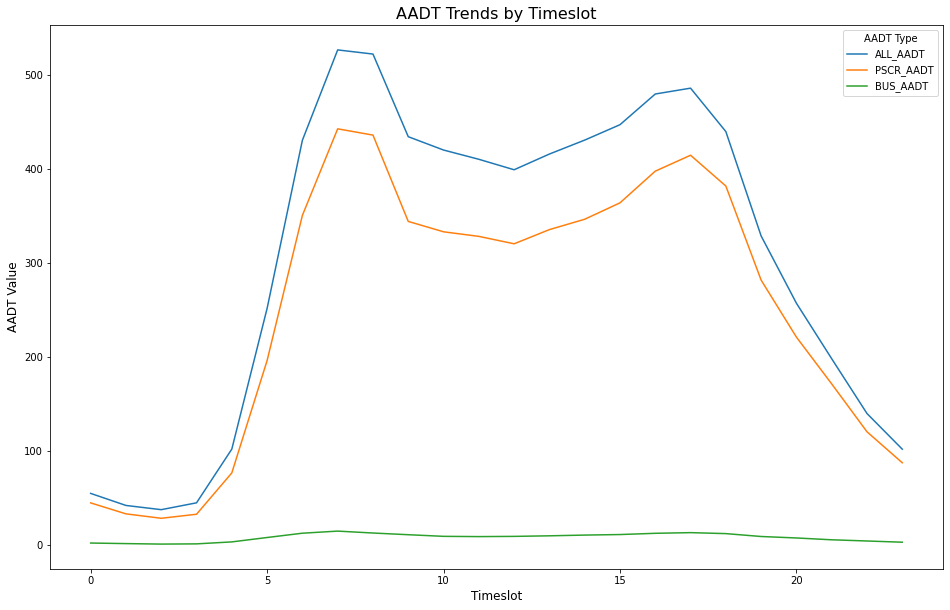

In [4]:
# 시간대에 따른 교통량의 변화
df_road_2022_t = df_road_2022[df_road_2022['timeslot'] != 'all'] # 전체 총합 관찰한 결과는 제외
df_road_2022_t['timeslot'] = df_road_2022_t['timeslot'].astype(int)

# 평균적인 시간대별 교통량 관찰
df_road_time = df_road_2022_t.groupby('timeslot')[['ALL_AADT', 'PSCR_AADT', 'BUS_AADT']].mean().reset_index()

# 데이터 변환: melt를 사용해 AADT 컬럼들을 한 열로 변환
df_road_time_melted = df_road_time.melt(id_vars='timeslot', 
                                        value_vars=['ALL_AADT', 'PSCR_AADT', 'BUS_AADT'], 
                                        var_name='AADT_type', 
                                        value_name='value')
# plot의 크기 지정
plt.figure(figsize=(16,10))

# 하나의 플롯에 모든 AADT 결과를 표시
sns.lineplot(data=df_road_time_melted, 
             x='timeslot', 
             y='value', 
             hue='AADT_type')  # AADT 유형별로 색상을 구분

# 그래프 레이블 및 제목
plt.title("AADT Trends by Timeslot", fontsize=16)
plt.xlabel("Timeslot", fontsize=12)
plt.ylabel("AADT Value", fontsize=12)
plt.legend(title="AADT Type")
plt.show()

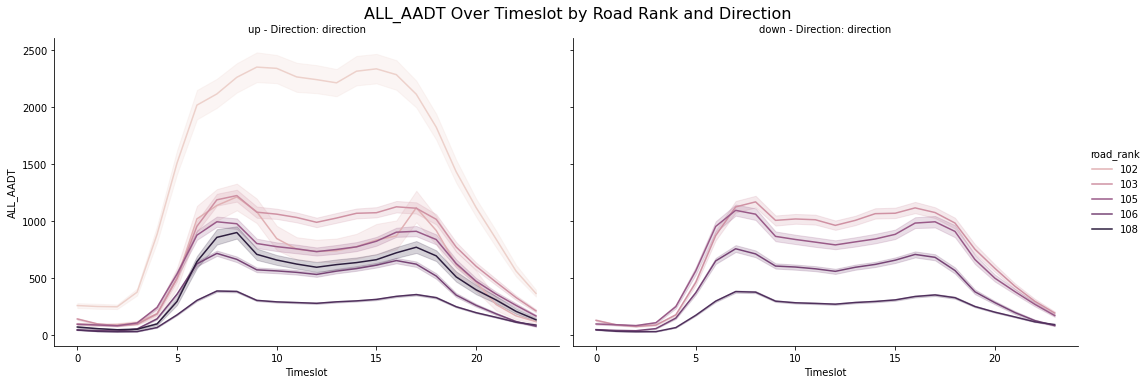

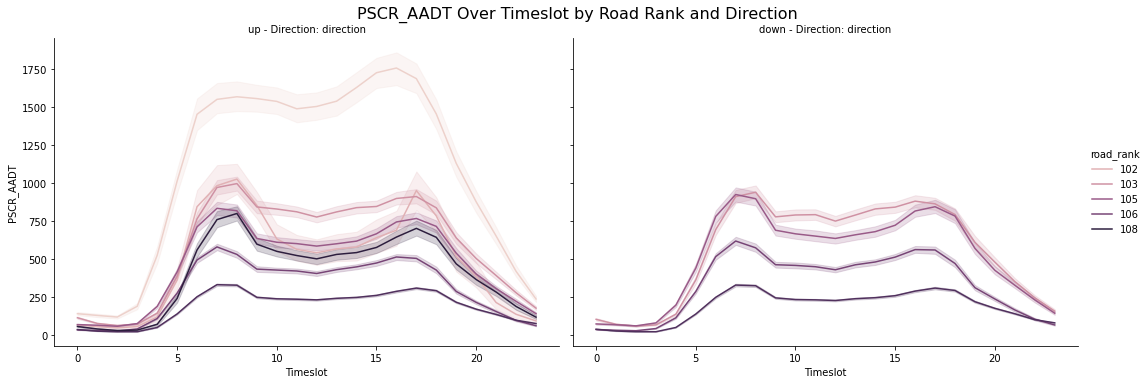

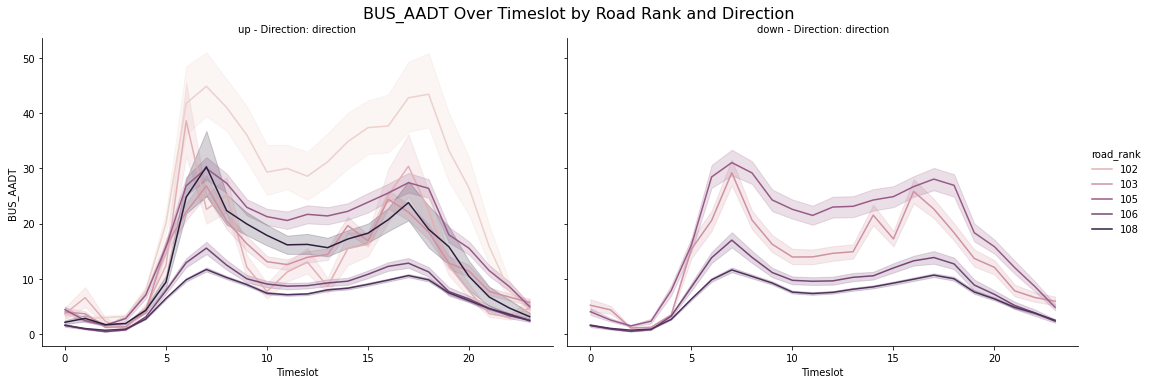

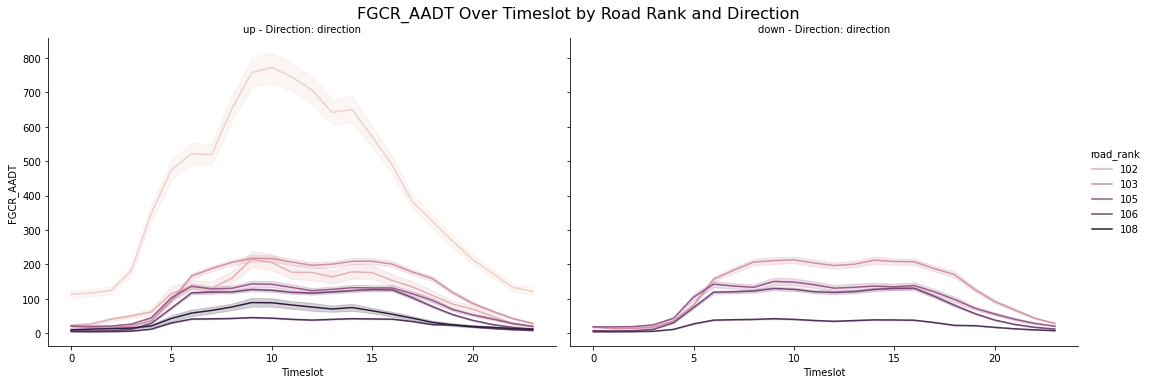

In [5]:
# 시간대별로 교통량 관찰
df_road_2022_t = df_road_2022[df_road_2022['timeslot'] != 'all']  # all은 시간 총합한 관찰 측정 결과
df_road_2022_t['timeslot'] = df_road_2022_t['timeslot'].astype(int)

# 방향(상행/하행) 컬럼 생성
df_road_2022_t['direction'] = df_road_2022_t['link_id'].astype('str').str[-2:]
df_road_2022_t['direction'] = df_road_2022_t['direction'].map({'01': 'up', '02': 'down'})

# AADT 관련 컬럼 리스트
AADT_list = df_road_2022_t.columns[df_road_2022_t.columns.str.endswith('AADT')].tolist()

# 각 AADT 컬럼에 대해 반복적으로 플롯 생성
for col_name in AADT_list:
    g = sns.relplot(
        data=df_road_2022_t,
        x='timeslot',
        y=col_name,
        hue='road_rank',
        col='direction',  # 방향에 따라 컬럼 분리
        kind='line',
        height=5,  # 그래프 높이 조정
        aspect=1.5  # 그래프 가로 세로 비율 조정
    )
    g.set_titles(col_template="{col_name} - Direction: {col_var}")  # 제목 설정
    g.set_axis_labels("Timeslot", col_name)  # 축 레이블 설정
    g.fig.suptitle(f"{col_name} Over Timeslot by Road Rank and Direction", fontsize=16, y=1.02)  # 전체 제목 설정


In [6]:
# 위의 시각화에서 하행일 떄 고속도로 데이터가 안나타난 이유 = 그냥 없어서
df_road_2022_highway = df_road_2022_t[df_road_2022_t['road_rank']==101]
df_road_2022_highway['direction'].unique()

array(['up'], dtype=object)

In [7]:
# 24시간의 총합 교통량을 다룬 데이터 활용 
df_road_2022_all = df_road_2022[df_road_2022['timeslot']=='all']

# 방향(상행/하행) 컬럼 생성
df_road_2022_all['direction'] = df_road_2022_all['link_id'].astype('str').str[-2:]
df_road_2022_all['direction'] = df_road_2022_all['direction'].map({'01' : 'up',
                                                            '02' : 'down'})

# 상행 하행 정보 제거한 링크 아이디 컬럼 생성
df_road_2022_all['link'] = df_road_2022_all['link_id'].astype('str').str[:-2]
df_road_2022_all['link'] = df_road_2022_all['link'].astype('int')

# df_road22의 총 링크 개수
df_link = df_road_2022_all[df_road_2022_all['direction']=='up']
df_link # 결과 :12126개, but 상세도로망 관측 결과 12146개의 링크가 존재함. (20개 결측치 발생해서 보간 필요)

,year,link_id,road_rank,road_length,road_nm,sido_nm,sgg_nm,emd_nm,timeslot,ALL_AADT,PSCR_AADT,BUS_AADT,FGCR_AADT,direction,link
828900,2022,47824846201,107,0.033,삼천병마로,경기도,화성시,팔탄면,all,8421.0,7573.0,231.0,617.0,up,478248462
828902,2022,47836069701,107,0.039,NaN,경기도,화성시,비봉면,all,10721.0,9444.0,86.0,1191.0,up,478360697
828910,2022,57235033901,107,0.472,NaN,경기도,화성시,동탄7동,all,3750.0,2087.0,188.0,1475.0,up,572350339
828913,2022,57138961501,107,0.043,장조로,경기도,화성시,화산동,all,10743.0,9523.0,502.0,718.0,up,571389615
828914,2022,47815022501,107,0.024,초록로166번길,경기도,화성시,양감면,all,916.0,551.0,11.0,354.0,up,478150225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947381,2022,57135738801,107,0.036,새강1길,경기도,화성시,동탄2동,all,1813.0,1700.0,29.0,83.0,up,571357388
947382,2022,47834097401,107,0.057,용주로,경기도,화성시,화산동,all,3667.0,3200.0,93.0,374.0,up,478340974
947385,2022,47825277001,107,0.012,상신하길로126번길,경기도,화성시,향남읍,all,7857.0,5760.0,294.0,1804.0,up,478252770
947386,2022,47735894501,106,0.024,화성로,경기도,화성시,비봉면,all,25772.0,21176.0,477.0,4119.0,up,477358945


In [8]:
# 상세 도로망 데이터 불러오기
gdf_road = gpd.read_file("../data/1-3.화성시_상세도로망.geojson")

# 2022년 데이터 활용 
gdf_road_2022 = gdf_road[gdf_road['year']==2022] 
gdf_road_2022

,year,link_id,max_speed,road_name,road_no,road_rank,link_type,pavement,road_type,facil_name,up_lanes,dw_lanes,oneway,length,up_its_id,dw_its_id,geometry
22839,2022,475200018,0,해안길,0,107,32768,0,0,None,1,1,0,0.118,0,0,"LINESTRING (126.61802 37.16365, 126.61934 37.1..."
22840,2022,475200026,50,해안길178번길,0,107,32768,0,0,None,1,1,0,0.123,2333247500,2333247400,"LINESTRING (126.61934 37.16377, 126.61940 37.1..."
22841,2022,475200028,0,None,0,107,32768,0,0,None,1,1,0,0.112,0,0,"LINESTRING (126.61848 37.16920, 126.61722 37.1..."
22842,2022,475200030,50,해안길178번길,0,107,32768,0,0,None,1,1,0,0.119,2333247500,2333247400,"LINESTRING (126.61825 37.17026, 126.61842 37.1..."
22843,2022,475200032,50,해안길178번길,0,107,32768,0,0,None,1,1,0,0.242,2333247500,2333247400,"LINESTRING (126.61848 37.16920, 126.61862 37.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34980,2022,928346680,60,세자로,0,107,32768,0,0,보통교,1,1,0,0.032,2333181800,2333181900,"LINESTRING (126.97837 37.18984, 126.97819 37.1..."
34981,2022,928355710,0,상리중앙로,0,107,32768,0,0,None,3,3,0,0.142,2333975800,2333975700,"LINESTRING (126.93943 37.22503, 126.93897 37.2..."
34982,2022,928355975,0,문학관항로,309,106,32768,0,0,None,2,2,0,0.553,0,0,"LINESTRING (126.97704 37.17270, 126.97736 37.1..."
34983,2022,928355984,0,문학관항로,309,106,4,0,0,None,2,2,0,0.025,0,0,"LINESTRING (126.97794 37.17780, 126.97800 37.1..."


In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
gdf_road = gpd.read_file("../data/1-3.화성시_상세도로망.geojson")

# 2022년 데이터 활용 
gdf_road_2022 = gdf_road[gdf_road['year']==2022] 

# 교통량 정보와 링크 정보 결합한 데이터프레임 생성
gdf_link = df_link.merge(gdf_road_2022, left_on='link', right_on="link_id", how='right')

# 컬럼 이름 정리
gdf_link.rename(columns={'link_id_x' : 'id', 'road_rank_x' : 'road_rank', 'link_id_y' : 'link_id'}, inplace=True)

# 사용하는 컬럼만 정리
gdf_link = gdf_link[['id', 'max_speed', 'road_rank', 'road_type', 'up_lanes', 'length', 'ALL_AADT',
                     'PSCR_AADT', 'BUS_AADT', 'geometry', 'link_id']]

na_area = gdf_link[gdf_link['ALL_AADT'].isna()]
na_area_list = na_area['link_id'].tolist()

In [10]:
from shapely.geometry import Point

# 결측치가 있는 도로 찾기
missing_aadt_link = gdf_link[gdf_link['ALL_AADT'].isna()]

# 연결된 도로 찾기 및 평균 교통량으로 결측치 채우기
for idx, row in missing_aadt_link.iterrows():
    # 결측치가 있는 도로의 geometry
    missing_geom = row['geometry']
    
    # 가까운 도로를 찾기 위한 거리 비교: 각 도로와의 거리를 계산
    distances = gdf_link['geometry'].apply(lambda x: missing_geom.distance(x))  # 각 도로와의 거리 계산
    
    # 일정 범위 내의 도로들만 찾기
    nearby_roads = gdf_link[distances < 0.01]  # 예시로 0.01로 거리 범위 설정
    
    # 교통량이 NaN이 아닌 도로만 필터링
    valid_roads = nearby_roads[nearby_roads['ALL_AADT'].notna()]
    
    if not valid_roads.empty:
        # 연결된 도로들의 ALL_AADT 평균 계산
        avg_aadt = valid_roads['ALL_AADT'].mean()
        
        # 결측치 있는 도로의 ALL_AADT를 평균값으로 채우기
        gdf_link.at[idx, 'ALL_AADT'] = avg_aadt

# 결과 확인
print(gdf_link['ALL_AADT'].isna().sum())  # 여전히 결측치가 있는지 확인

0


In [11]:
# 결과 확인
gdf_link[gdf_link['link_id'].isin(na_area_list)]  # 여전히 결측치가 있는지 확인

,id,max_speed,road_rank,road_type,up_lanes,length,ALL_AADT,PSCR_AADT,BUS_AADT,geometry,link_id
1031,NaN,0,NaN,0,1,0.047,1961.489796,NaN,NaN,"LINESTRING (126.85300 37.03049, 126.85261 37.0...",477147226
3280,NaN,0,NaN,0,1,0.025,10304.896552,NaN,NaN,"LINESTRING (126.84219 37.22273, 126.84232 37.2...",477357548
3494,NaN,0,NaN,0,1,0.028,5483.413793,NaN,NaN,"LINESTRING (126.85009 37.25760, 126.85010 37.2...",477468520
4061,NaN,0,NaN,0,1,0.035,7600.633333,NaN,NaN,"LINESTRING (126.93956 37.16026, 126.93951 37.1...",478241599
4062,NaN,0,NaN,0,1,0.020,7802.321111,NaN,NaN,"LINESTRING (126.93967 37.16011, 126.93967 37.1...",478241601
4063,NaN,0,NaN,0,1,0.015,7606.936076,NaN,NaN,"LINESTRING (126.93955 37.16003, 126.93960 37.1...",478241602
5170,NaN,0,NaN,0,1,0.007,6226.946667,NaN,NaN,"LINESTRING (126.90116 37.11050, 126.90108 37.1...",478253786
5512,NaN,0,NaN,0,1,0.007,2469.642857,NaN,NaN,"LINESTRING (126.97565 37.13167, 126.97558 37.1...",478257982
5517,NaN,0,NaN,0,1,0.011,2586.241071,NaN,NaN,"LINESTRING (126.97531 37.13131, 126.97526 37.1...",478257990
5519,NaN,0,NaN,0,1,0.013,2633.647098,NaN,NaN,"LINESTRING (126.97498 37.13145, 126.97504 37.1...",478257993


In [13]:
gdf_link.to_csv('./data/화성시_링크_교통량.csv', index=False)

## 공유차량 이용현황+공공주택과 함께 관찰

### 데이터 준비

In [14]:
import pandas as pd
import numpy as np

# 공유차량 이용현황 데이터 불러오기
df_use = pd.read_csv('../data/1-11.화성시_공유차량_이용현황.csv')

df_use.head()

,cmplx_nm,blck_cd,cnt_2008,tm_2008,cnt_2009,tm_2009,cnt_2010,tm_2010,cnt_2011,tm_2011,...,cnt_2310,tm_2310,cnt_2311,tm_2311,cnt_2312,tm_2312,total_cnt,total_tm,car_type,car_cnt
0,화성남양뉴타운10,C02347,41.0,152.0,42.0,181.0,26.0,82.0,35.0,58.0,...,15.0,25.0,9.0,21.0,8.0,29.0,855,2888,모닝어반,1.0
1,화성남양뉴타운4,C01961,25.0,224.0,6.0,43.0,1.0,6.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,104,645,NaN,NaN
2,화성남양뉴타운9,C02042,11.0,82.0,13.0,20.0,22.0,17.0,36.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,889,2151,NaN,NaN
3,화성능동7-2,C01569,45.0,142.0,44.0,117.0,63.0,263.0,39.0,113.0,...,23.0,37.0,25.0,29.0,27.0,50.0,1377,3912,더뉴레이,1.0
4,화성동탄2 28(행복주택),C02333,55.0,128.0,63.0,169.0,45.0,102.0,47.0,133.0,...,26.0,54.0,41.0,93.0,45.0,74.0,2090,6514,더뉴레이/올뉴모닝,2.0


In [15]:
import pandas as pd
import numpy as np

# 공공주택 데이터 불러오기
df_house = pd.read_csv('../data/1-12.공공주택임대_정보(화성시).csv')
df_house.head()

,blck_cd,blck_nm,type,noh,parking_slot,lon,lat
0,C00414,화성태안12,국민임대,1178,1767.0,127.041121,37.217786
1,C00415,화성태안6,국민임대,990,1485.0,127.049830,37.212454
2,C00416,화성태안8,국민임대,836,1254.0,127.047309,37.215054
3,C00447,화성매송(1단지)(국임),국민임대,649,973.5,126.880070,37.266522
4,C01566,화성동탄7-1(1-1)(7단지 능동),국민임대,682,1023.0,127.060256,37.216649


### 비그래프적 EDA

In [16]:
# 집 종류에 따른 세대수 합계, 주차면수 합계
df_house.groupby('type').agg(
    count_type = ('type', 'count'),
    sum_house = ('noh', 'sum'),
    sum_parking_slot=('parking_slot', 'sum'),
).reset_index()

,type,count_type,sum_house,sum_parking_slot
0,공공임대,13,9312,13968.0
1,국민임대,35,31938,47907.0
2,영구임대,9,2936,4404.0
3,행복주택,22,14562,21843.0


In [17]:
# df_house의 블록코드가 df_use의 블록코드 전부 포함하는지 확인
print('공유차량 이용현황의 블록코드 종류 개수 :', df_use['blck_cd'].nunique())
print('그 중 공공주택 데이터의 블로코드의 종류와 겹치는 개수는', len(set(df_use['blck_cd']) & set(df_house['blck_cd'])))

공유차량 이용현황의 블록코드 종류 개수 : 30
그 중 공공주택 데이터의 블로코드의 종류와 겹치는 개수는 30


In [18]:
# 블록단지별로 세대수와 주차면서 합계 및 위도 경도 추출
df_num = df_house.groupby('blck_cd').agg(
    noh=('noh', 'sum'),
    parking_slot=('parking_slot', 'sum'),
    lon=('lon', 'first'),
    lat=('lat', 'first')
).reset_index()

df_num.head()  

,blck_cd,noh,parking_slot,lon,lat
0,C00414,1178,1767.0,127.041121,37.217786
1,C00415,990,1485.0,127.049830,37.212454
2,C00416,836,1254.0,127.047309,37.215054
3,C00447,649,973.5,126.880070,37.266522
4,C01566,682,1023.0,127.060256,37.216649


In [19]:
# 공동주택과 공용차량 결합한 데이터프레임 생성
df_log = df_use.merge(df_num, on='blck_cd')
df_log.head()

,cmplx_nm,blck_cd,cnt_2008,tm_2008,cnt_2009,tm_2009,cnt_2010,tm_2010,cnt_2011,tm_2011,...,cnt_2312,tm_2312,total_cnt,total_tm,car_type,car_cnt,noh,parking_slot,lon,lat
0,화성남양뉴타운10,C02347,41.0,152.0,42.0,181.0,26.0,82.0,35.0,58.0,...,8.0,29.0,855,2888,모닝어반,1.0,1022,1533.0,126.834651,37.206978
1,화성남양뉴타운4,C01961,25.0,224.0,6.0,43.0,1.0,6.0,2.0,2.0,...,NaN,NaN,104,645,NaN,NaN,876,1314.0,126.829787,37.210028
2,화성남양뉴타운9,C02042,11.0,82.0,13.0,20.0,22.0,17.0,36.0,50.0,...,NaN,NaN,889,2151,NaN,NaN,782,1173.0,126.833895,37.209028
3,화성능동7-2,C01569,45.0,142.0,44.0,117.0,63.0,263.0,39.0,113.0,...,27.0,50.0,1377,3912,더뉴레이,1.0,963,1444.5,127.061128,37.211268
4,화성동탄2 28(행복주택),C02333,55.0,128.0,63.0,169.0,45.0,102.0,47.0,133.0,...,45.0,74.0,2090,6514,더뉴레이/올뉴모닝,2.0,816,1224.0,127.094684,37.163702


### 지도 시각화
- 공유차량 이용 데이터는 외부로 다운로드를 받을 수 없어서 QGIS가 아닌 맷플롯립으로 시각화함

In [21]:
# 화성 지역 데이터 불러오기
shapefile_path = "../data/QGIS/타겟지역.shp"  # shapefile 경로
region = gpd.read_file(shapefile_path)

# 화성시 데이터만 불러오기
region_h = region[region['SGG_NM']=='경기도 화성시']
region_h

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry
1,41590,경기도 화성시,1978,41590,"MULTIPOLYGON (((126.72566 37.00909, 126.72562 ..."


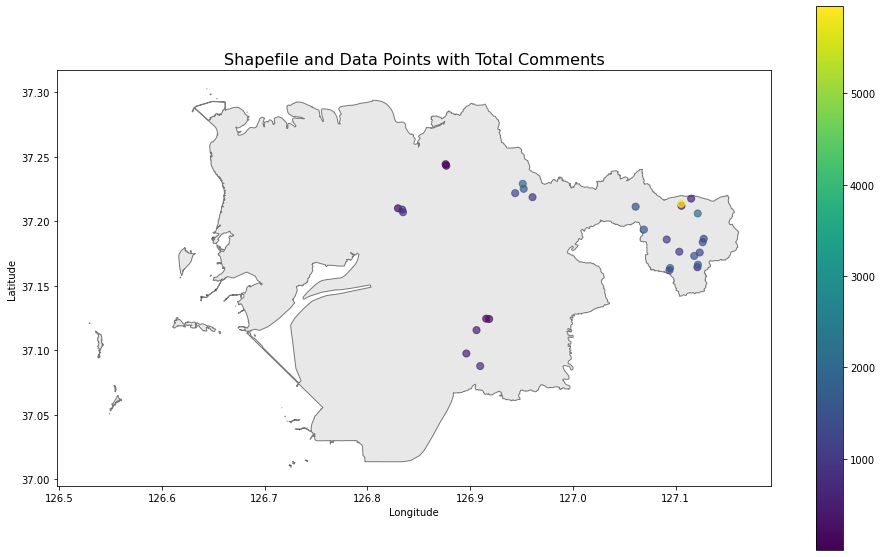

In [22]:
from shapely.geometry import Point

# df_log의 lat, lon을 geometry로 변환
geometry = [Point(xy) for xy in zip(df_log['lon'], df_log['lat'])]
gdf_log = gpd.GeoDataFrame(df_log, geometry=geometry, crs="EPSG:4326")  # 좌표계 설정

# 지도 시각화
fig, ax = plt.subplots(figsize=(16, 10))

# 화성 지도 가져오기
region_h.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)

# DataFrame 점 데이터 시각화
scatter = gdf_log.plot(
    ax=ax,
    column='total_cnt',  # 총 이용 수로 색깔 매핑
    cmap='viridis',
    markersize=50,
    legend=True,
    alpha=0.7
)

# 제목 및 기타 설정
ax.set_title("Shapefile and Data Points with Total Comments", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

In [24]:
from shapely.geometry import LineString
import geopandas as gpd

# 고속도로와 국도를 추가하여 관찰
gdf_link_highway = gdf_link[gdf_link['road_rank'].isin([101, 102, 103])]

# geometry 컬럼을 shapely LineString 객체로 변환
def parse_linestring(line):
    if isinstance(line, str):
        # "LINESTRING" 제거 및 좌표 문자열 추출
        coord_text = line.replace("LINESTRING", "").replace("(", "").replace(")", "").strip()
        # 좌표 문자열을 파싱하여 튜플 리스트로 변환
        coordinates = [tuple(map(float, coord.split())) for coord in coord_text.split(",")]
        return LineString(coordinates)
    return line

gdf_link_highway['geometry'] = gdf_link_highway['geometry'].apply(parse_linestring)

# GeoDataFrame으로 변환
gdf_links_highway = gpd.GeoDataFrame(gdf_link_highway, geometry=gdf_link_highway['geometry'], crs="EPSG:4326")
gdf_links_highway.head()

,id,max_speed,road_rank,road_type,up_lanes,length,ALL_AADT,PSCR_AADT,BUS_AADT,geometry,link_id
613,4.764413e+10,100,101.0,3,2,2.795,35100.0,21933.0,789.0,"LINESTRING (126.74552 37.28852, 126.74542 37.2...",476441296
615,4.764420e+10,100,101.0,0,2,0.817,37756.0,21643.0,603.0,"LINESTRING (126.74579 37.28116, 126.74552 37.2...",476441993
616,4.764420e+10,100,101.0,0,2,3.643,36326.0,20750.0,688.0,"LINESTRING (126.75414 37.25008, 126.75350 37.2...",476441994
617,4.764420e+10,100,101.0,3,2,0.045,34673.0,20501.0,677.0,"LINESTRING (126.74581 37.28075, 126.74579 37.2...",476441995
618,4.764420e+10,100,101.0,0,2,3.654,37641.0,22997.0,676.0,"LINESTRING (126.74562 37.28075, 126.74565 37.2...",476441996


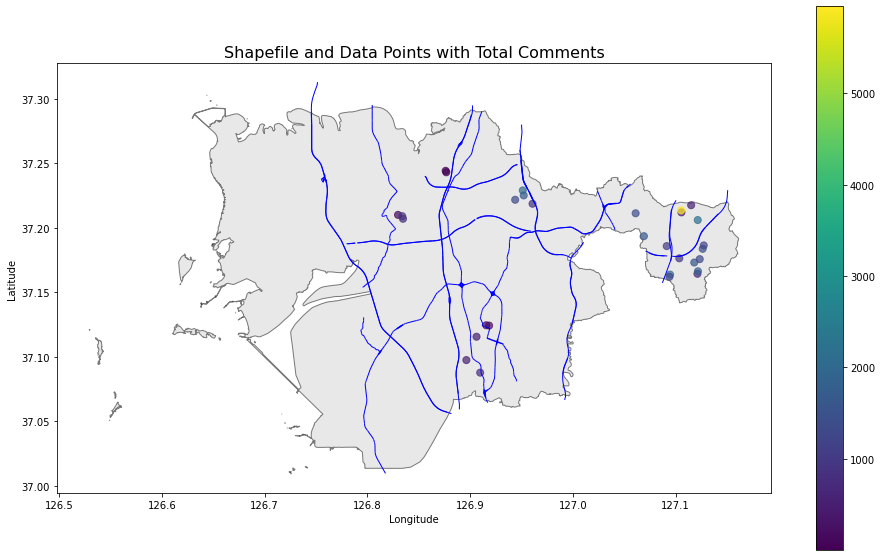

In [25]:
# 국도와 고속도로를 추가한 시각화
fig, ax = plt.subplots(figsize=(16, 10))

# 화성시 지도 불러오기
region_h.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)

# LineString 데이터 출력
gdf_links_highway.plot(ax=ax, color='blue', linewidth=1, label='Links')

# DataFrame 점 데이터 시각화
scatter = gdf_log.plot(
    ax=ax,
    column='total_cnt',  # 색상을 매핑할 컬럼
    cmap='viridis',
    markersize=50,
    legend=True,
    alpha=0.7
)

# 제목 및 기타 설정
ax.set_title("Shapefile and Data Points with Total Comments", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

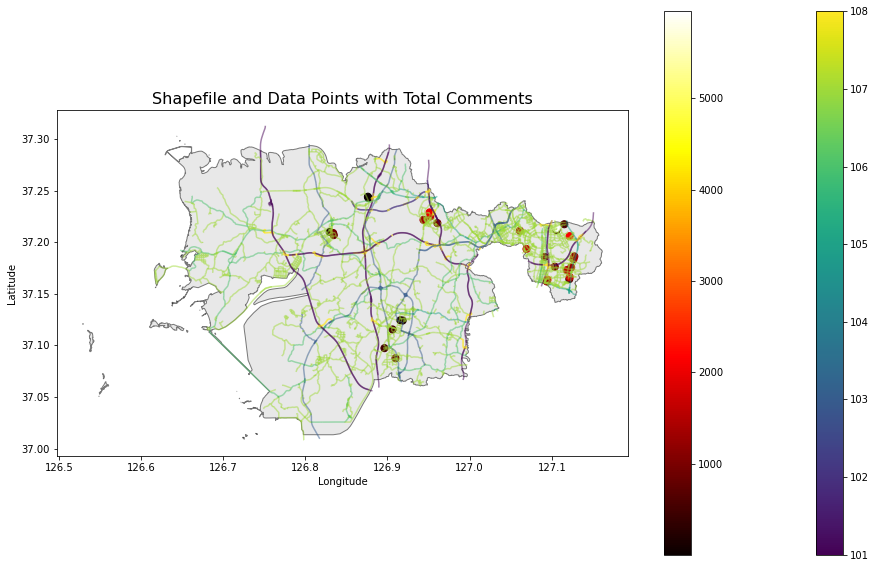

In [27]:
# 모든 도로 데이터를 LineString으로 변환
gdf_link['geometry'] = gdf_link['geometry'].apply(parse_linestring)

# GeoDataFrame으로 변환
gdf_links = gpd.GeoDataFrame(gdf_link, geometry=gdf_link['geometry'], crs="EPSG:4326")

# 지도 시각화
fig, ax = plt.subplots(figsize=(16, 10))
region_h.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)

# LineString 데이터 출력 (road_rank로 색상 매핑)
gdf_links.plot(
    ax=ax,
    column='road_rank',  # 색상을 매핑할 컬럼
    cmap='viridis',       # 컬러맵 설정
    linewidth=1.5,
    legend=True,
    alpha=0.5
)

# DataFrame 점 데이터 시각화
scatter = gdf_log.plot(
    ax=ax,
    column='total_cnt',  # 색상을 매핑할 컬럼
    cmap='hot',
    markersize=50,
    legend=True,
)

# 제목 및 기타 설정
ax.set_title("Shapefile and Data Points with Total Comments", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

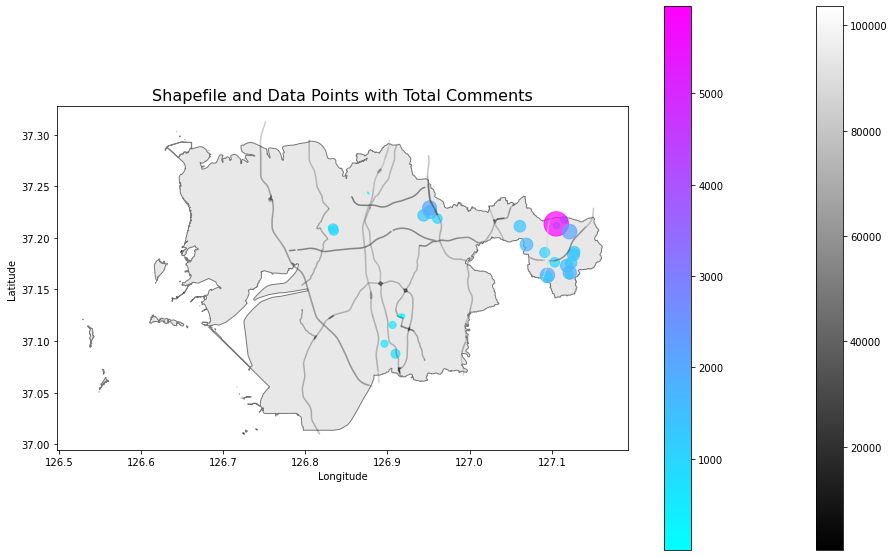

In [28]:
# 지도 시각화
fig, ax = plt.subplots(figsize=(16, 10))
region_h.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)

# LineString 데이터 출력 
gdf_links_highway.plot(
    ax=ax,
    column='ALL_AADT',  # 색상을 매핑할 컬럼
    cmap='gray',         # 컬러맵 설정
    linewidth=1.5,
    legend=True,
    alpha=0.3
)

# DataFrame 점 데이터 시각화 
scatter = gdf_log.plot(
    ax=ax,
    column='total_cnt',  # 색상을 매핑할 컬럼
    cmap='cool',
    markersize= gdf_log['total_cnt']*0.1,  # 크기를 매핑할 값 (스케일 조정 가능)
    legend=True,
    alpha=0.7
)

# 제목 및 기타 설정
ax.set_title("Shapefile and Data Points with Total Comments", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()